In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Step 1: Data Loading
train_df = pd.read_csv('train.csv')  # Assuming 'train.csv' is the training data file

In [41]:
# Step 2: Data Preprocessing
# Dropping unnecessary columns
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [42]:
# Handling missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [43]:
# Converting categorical variables to numerical
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

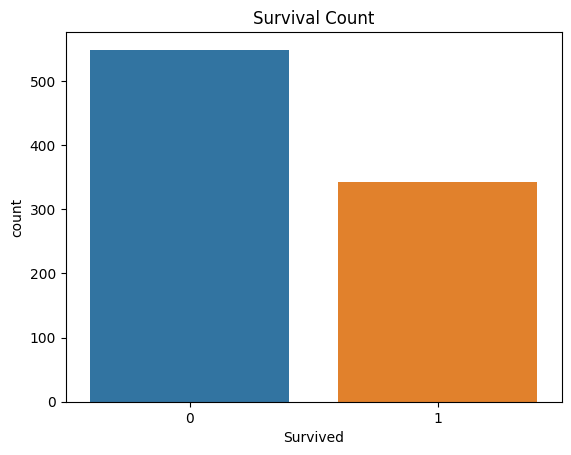

In [44]:
# Step 3: Exploratory Data Analysis (EDA)
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

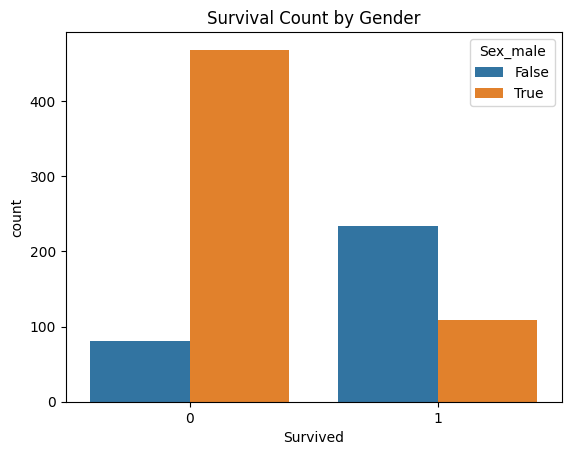

In [45]:
sns.countplot(x='Survived', hue='Sex_male', data=train_df)
plt.title('Survival Count by Gender')
plt.show()

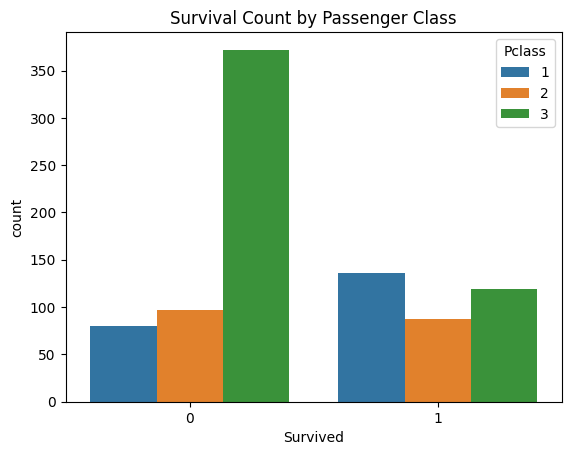

In [46]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival Count by Passenger Class')
plt.show()


In [47]:
# Step 4: Model Selection
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Step 5: Model Training
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
# Step 6: Model Evaluation
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [50]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



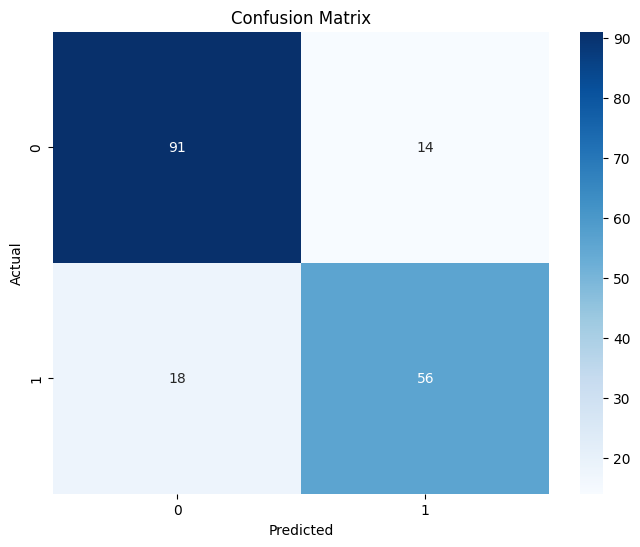

In [51]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()